In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [2]:
data_train = pd.read_csv("data set\\spliting data\\train part_1.csv")





data_train_1 = pd.read_csv("data set\spliting data\\train part_1.csv")
data_train_2 = pd.read_csv("data set\\spliting data\\train part_2.csv")
data_train_3 = pd.read_csv("data set\\spliting data\\train part_3.csv")
data_train_4 = pd.read_csv("data set\\spliting data\\train part_4.csv")
data_train_5 = pd.read_csv("data set\\spliting data\\train part_5.csv")





data_train=pd.concat([data_train_1, data_train_2,data_train_3,data_train_4,data_train_5], axis=0)




data_test= pd.read_csv("data set\\spliting data\\all_test.csv")
data_val= pd.read_csv("data set\\spliting data\\all_val.csv")

data_train = data_train.sample(frac=1).reset_index(drop=True)
data_test = data_test.sample(frac=1).reset_index(drop=True)
data_val = data_val.sample(frac=1).reset_index(drop=True)



In [3]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,fake,-276.601501,41.293339,-17.838762,-11.233909,-25.393951,-30.513741,-27.467768,-16.785500,-17.963062,...,-7.450230,-6.562011,-6.630246,-3.173558,-2.408521,2.513649,2.167118,5.935223,4.129679,5.644649
1,fake,-297.985657,62.014771,-29.964745,-11.478569,-10.819266,-47.259243,-28.342957,-23.461405,-21.032534,...,-11.392353,-9.479615,-9.571318,-5.351718,-5.957901,-0.698822,-2.055389,4.037170,3.240905,4.250447
2,fake,-306.158936,25.872345,-7.270486,-16.643885,-34.503906,-32.832966,-17.582624,-13.506034,-17.191238,...,-8.937447,-8.781644,-8.377001,-4.174711,-2.131364,0.847321,0.475097,3.728307,2.626926,3.843628
3,fake,-302.628174,34.738804,-7.300676,-6.811427,-29.118427,-24.529924,-26.251396,-15.923079,-13.599035,...,-6.737600,-6.867988,-7.004234,-2.952516,-1.621227,1.521518,1.658624,5.488263,5.127154,4.995843
4,fake,-337.172241,42.034950,-24.408125,-18.372023,-41.842018,-33.593132,-20.297607,-11.313924,-18.611017,...,-7.447847,-6.773039,-6.845003,-3.662462,-2.797198,1.608973,1.629949,5.411217,4.941548,4.828488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117888,real,-324.926178,50.819180,-23.954535,-6.615593,-37.239239,-38.832081,-12.795437,-12.390265,-21.728346,...,-8.722697,-6.053395,-6.839262,-5.623265,-2.862239,0.566466,2.662360,5.378216,4.356030,4.452492
117889,fake,-294.462982,35.778934,-27.802832,-18.571411,-32.793507,-27.114523,-23.094831,-7.946316,-17.531475,...,-6.627631,-6.359477,-6.163485,-3.217338,-2.638255,2.150933,2.790071,5.899235,4.597145,5.022678
117890,fake,-314.345276,24.397734,-7.254725,-14.439903,-28.313179,-25.032808,-30.339560,-9.754941,-8.099724,...,-7.523287,-6.170432,-6.953040,-3.664593,-2.589489,1.137999,1.518188,4.497338,3.658751,4.606102
117891,fake,-343.764526,57.167385,-20.084328,-11.506477,-36.269455,-37.543415,-20.666935,1.628256,-16.119928,...,-7.840016,-6.169359,-5.754247,-4.126003,-2.167558,0.458413,1.312992,4.625014,3.121939,4.461907


# Encoding

In [4]:
def encodeing(row):
    if row == "real":
      row = 0
    else :
      row =1
    return row

      

In [5]:
# data_train['label'] = data_train['label'].apply(encodeing)
# data_test['label']=data_test['label'].apply(encodeing)
# data_val['label']=data_test['label'].apply(encodeing)

In [6]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,fake,-276.601501,41.293339,-17.838762,-11.233909,-25.393951,-30.513741,-27.467768,-16.785500,-17.963062,...,-7.450230,-6.562011,-6.630246,-3.173558,-2.408521,2.513649,2.167118,5.935223,4.129679,5.644649
1,fake,-297.985657,62.014771,-29.964745,-11.478569,-10.819266,-47.259243,-28.342957,-23.461405,-21.032534,...,-11.392353,-9.479615,-9.571318,-5.351718,-5.957901,-0.698822,-2.055389,4.037170,3.240905,4.250447
2,fake,-306.158936,25.872345,-7.270486,-16.643885,-34.503906,-32.832966,-17.582624,-13.506034,-17.191238,...,-8.937447,-8.781644,-8.377001,-4.174711,-2.131364,0.847321,0.475097,3.728307,2.626926,3.843628
3,fake,-302.628174,34.738804,-7.300676,-6.811427,-29.118427,-24.529924,-26.251396,-15.923079,-13.599035,...,-6.737600,-6.867988,-7.004234,-2.952516,-1.621227,1.521518,1.658624,5.488263,5.127154,4.995843
4,fake,-337.172241,42.034950,-24.408125,-18.372023,-41.842018,-33.593132,-20.297607,-11.313924,-18.611017,...,-7.447847,-6.773039,-6.845003,-3.662462,-2.797198,1.608973,1.629949,5.411217,4.941548,4.828488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117888,real,-324.926178,50.819180,-23.954535,-6.615593,-37.239239,-38.832081,-12.795437,-12.390265,-21.728346,...,-8.722697,-6.053395,-6.839262,-5.623265,-2.862239,0.566466,2.662360,5.378216,4.356030,4.452492
117889,fake,-294.462982,35.778934,-27.802832,-18.571411,-32.793507,-27.114523,-23.094831,-7.946316,-17.531475,...,-6.627631,-6.359477,-6.163485,-3.217338,-2.638255,2.150933,2.790071,5.899235,4.597145,5.022678
117890,fake,-314.345276,24.397734,-7.254725,-14.439903,-28.313179,-25.032808,-30.339560,-9.754941,-8.099724,...,-7.523287,-6.170432,-6.953040,-3.664593,-2.589489,1.137999,1.518188,4.497338,3.658751,4.606102
117891,fake,-343.764526,57.167385,-20.084328,-11.506477,-36.269455,-37.543415,-20.666935,1.628256,-16.119928,...,-7.840016,-6.169359,-5.754247,-4.126003,-2.167558,0.458413,1.312992,4.625014,3.121939,4.461907


In [7]:
count = data_train['label'].value_counts()
print(count)


fake    107413
real     10480
Name: label, dtype: int64


In [8]:
# Assuming 'data' is your DataFrame
X_train = data_train.drop(columns='label').values  # Features
y_train = np.array(data_train['label'].values)  # Labels

# # Encode the labels using LabelEncoder (if not already done)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# num_classes = len(label_encoder.classes_)

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_val = data_val.drop(columns='label').values  # Features
y_val = np.array(data_val['label'].values)  # Labels

X_test = data_test.drop(columns='label').values  # Features
y_test = np.array(data_test['label'].values)  # Labels


In [9]:
import pandas as pd
y_train = pd.get_dummies(y_train)
y_val=pd.get_dummies(y_val)
y_test=pd.get_dummies(y_test)

In [10]:
y_train

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
117888,0,1
117889,1,0
117890,1,0
117891,1,0


In [11]:
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

from keras.layers import Conv1D, MaxPooling1D, Flatten

import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# tf.config.set_visible_devices(gpus[0], 'GPU')
# logical_gpus = tf.config.list_logical_devices('GPU')
# print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")

model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 128)           512       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 197,314
Trainable params: 197,314
Non-trainable params: 0
__________________________________________________

In [12]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 1s - loss: 0.1019 - accuracy: 0.9667 - 1s/epoch - 3ms/step
Test Accuracy: 96.67%


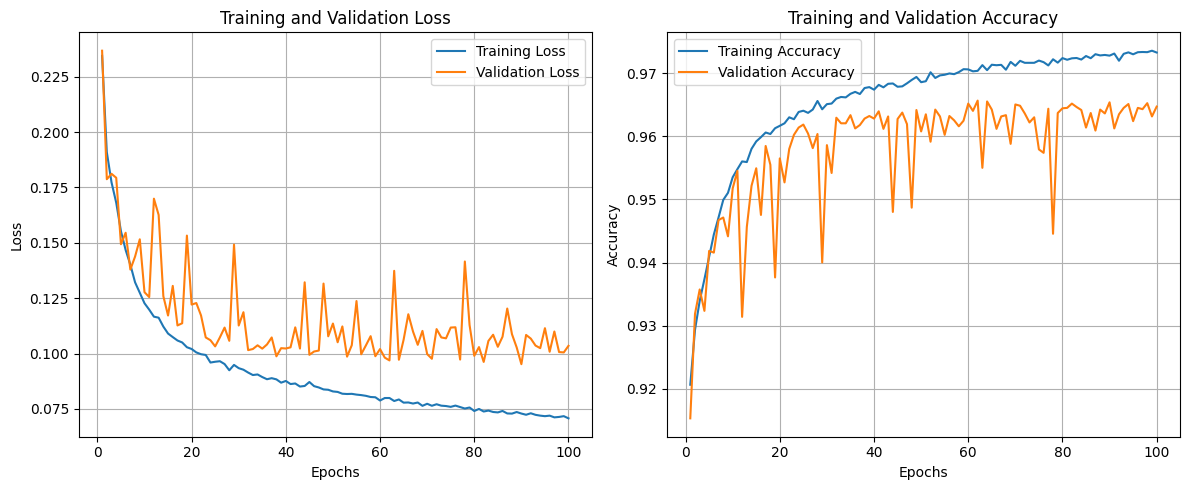

In [13]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [14]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


461/461 [==============================] - 1s 1ms/step


In [15]:
y_test

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14731,1,0
14732,1,0
14733,0,1
14734,1,0


In [16]:
y_ture=np.argmax(y_test.values, axis=1)


In [17]:
y_ture

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

Test f1_score : 79.19%


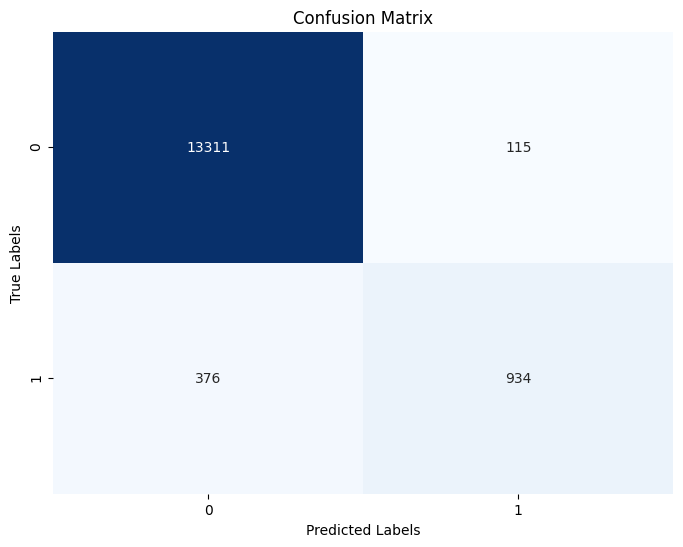

In [18]:


from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
y_pred_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
y_test

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14731,1,0
14732,1,0
14733,0,1
14734,1,0


# eraly stopping

In [21]:

from keras.layers import Conv1D, MaxPooling1D, Flatten

import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# tf.config.set_visible_devices(gpus[0], 'GPU')
# logical_gpus = tf.config.list_logical_devices('GPU')
# print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")

model = Sequential()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
# Add a 1D convolutional layer
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val),callbacks=[callback])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 48, 128)           512       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 24, 128)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                196672    
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 197,314
Trainable params: 197,314
Non-trainable params: 0
________________________________________________

Epoch 1/100
1843/1843 [==============================] - 10s 5ms/step - loss: 0.2331 - accuracy: 0.9212 - val_loss: 0.2427 - val_accuracy: 0.9156
Epoch 2/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.1921 - accuracy: 0.9298 - val_loss: 0.1891 - val_accuracy: 0.9279
Epoch 3/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.1802 - accuracy: 0.9328 - val_loss: 0.1788 - val_accuracy: 0.9340
Epoch 4/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.1742 - accuracy: 0.9346 - val_loss: 0.1803 - val_accuracy: 0.9334
Epoch 5/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.1667 - accuracy: 0.9363 - val_loss: 0.1665 - val_accuracy: 0.9366
Epoch 6/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.1628 - accuracy: 0.9381 - val_loss: 0.1760 - val_accuracy: 0.9316
Epoch 7/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.1537 - accuracy: 0.9413 - val_loss: 0.1497 - val_a

In [22]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 1s - loss: 0.1121 - accuracy: 0.9590 - 1s/epoch - 2ms/step
Test Accuracy: 95.90%


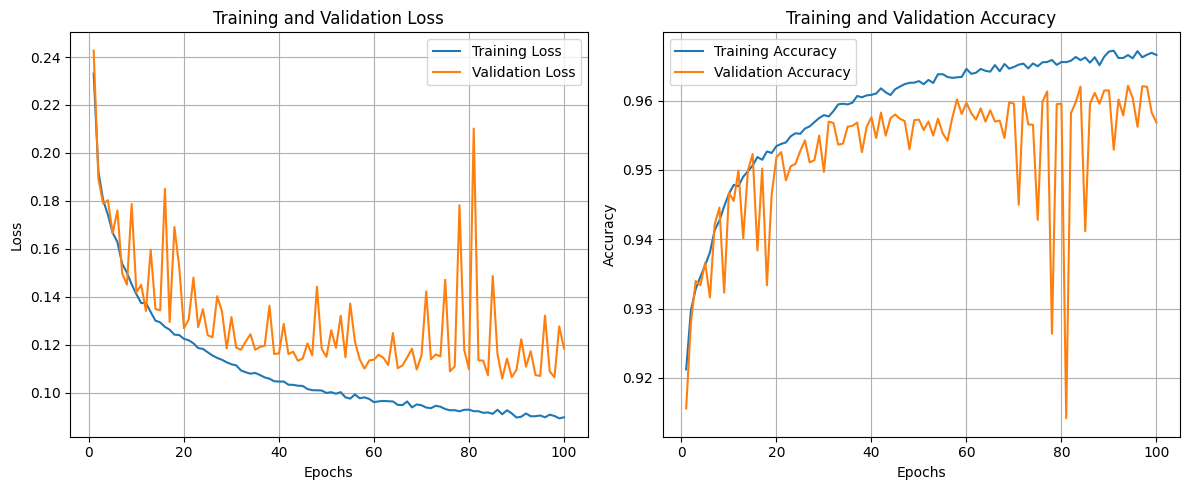

In [23]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 1s 1ms/step
Test f1_score : 74.75%


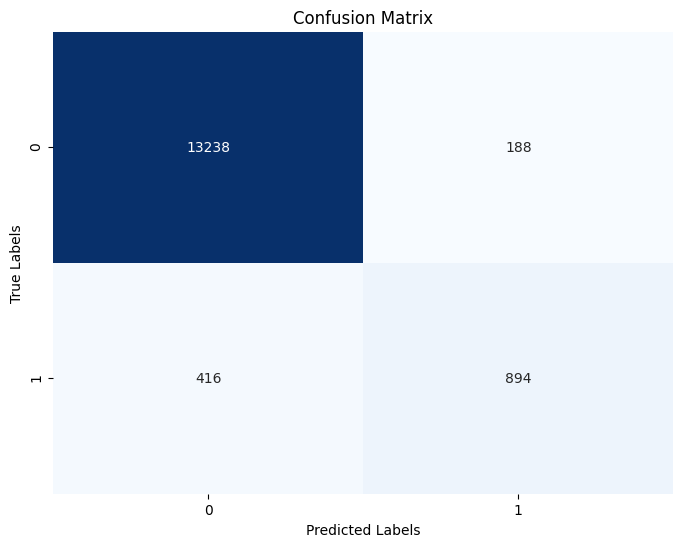

In [24]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()